In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load historical stock prices
data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date', dayfirst = True)
stock_prices = data['Adjusted Close']
stock_symbol = 'AAPL'

# Calculate daily returns
returns = stock_prices.pct_change().dropna()

# Set confidence level and time horizon
confidence_level = 0.95  # 95% confidence level
time_horizon = 252  # 1 year

# Historical VaR
historical_var = returns.quantile(1 - confidence_level)
historical_var_value = stock_prices.iloc[-1] * historical_var

# Conditional VaR (CVaR)
conditional_var = returns[returns <= historical_var].mean()
conditional_var_value = stock_prices.iloc[-1] * conditional_var

In [3]:
# Display VaR results
print(f'Historical VaR ({confidence_level}): {historical_var_value:.4f}')
print(f'Conditional VaR ({confidence_level}): {conditional_var_value:.4f}')


Historical VaR (0.95): -5.8487
Conditional VaR (0.95): -8.7866


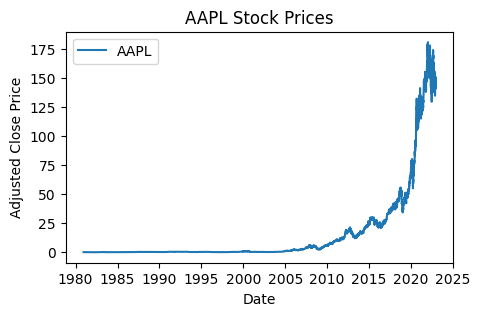

In [4]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(stock_prices, label=stock_symbol)
plt.title(f'{stock_symbol} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [5]:
# Load historical stock prices for three stocks
stocks = ['AAPL', 'MSFT', 'AMZN']

# Initialize an empty DataFrame to store stock prices
stock_prices = pd.DataFrame()

# Load stock prices for each stock and concatenate into the DataFrame
for stock_symbol in stocks:
    data = pd.read_csv(f'{stock_symbol}.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)
    stock_prices[stock_symbol] = data['Adjusted Close']

# Calculate daily returns for each stock
returns = stock_prices.pct_change().dropna()

# Set confidence level and time horizon
confidence_level = 0.95  # 95% confidence level
time_horizon = 252  # 1 year

# Historical VaR for the portfolio
historical_var_portfolio = np.percentile(np.sum(returns, axis=1), 100 * (1 - confidence_level))
historical_var_value_portfolio = np.sum(stock_prices.iloc[-1] * historical_var_portfolio)

# Conditional VaR (CVaR) for the portfolio
conditional_var_portfolio = np.mean(returns[returns <= historical_var_portfolio].sum(axis=1))
conditional_var_value_portfolio = np.sum(stock_prices.iloc[-1] * conditional_var_portfolio)

# Display VaR results for the portfolio
print(f'Historical VaR for the portfolio ({confidence_level}): {historical_var_value_portfolio:.4f}')
print(f'Conditional VaR for the portfolio ({confidence_level}): {conditional_var_value_portfolio:.4f}')

Historical VaR for the portfolio (0.95): -47.3543
Conditional VaR for the portfolio (0.95): -0.8748


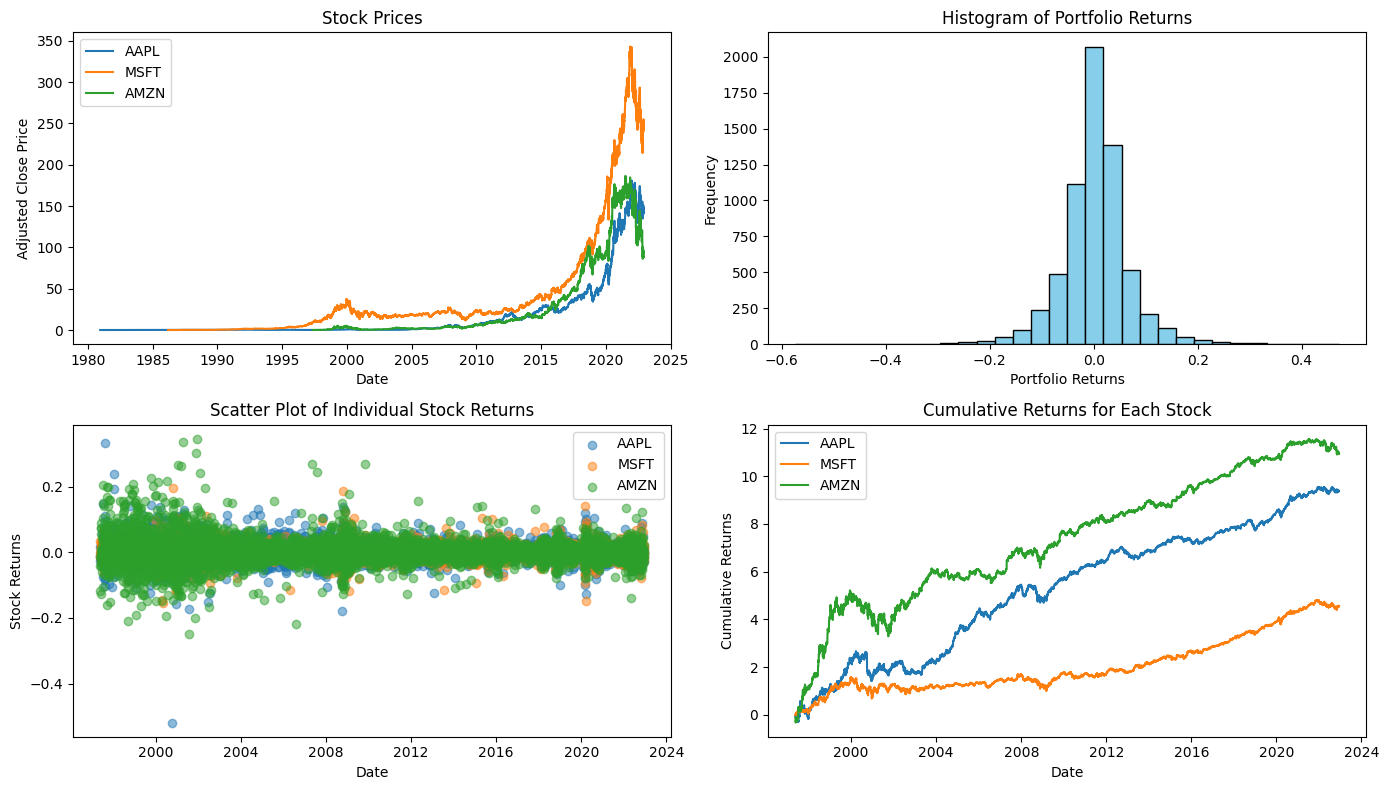

In [6]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot stock prices
plt.subplot(2, 2, 1)
for stock_symbol in stocks:
    plt.plot(stock_prices[stock_symbol], label=stock_symbol)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Plot histogram of portfolio returns
plt.subplot(2, 2, 2)
plt.hist(np.sum(returns, axis=1), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Portfolio Returns')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')

# Plot scatter plot of individual stock returns
plt.subplot(2, 2, 3)
for stock_symbol in stocks:
    plt.scatter(returns.index, returns[stock_symbol], label=stock_symbol, alpha=0.5)
plt.title('Scatter Plot of Individual Stock Returns')
plt.xlabel('Date')
plt.ylabel('Stock Returns')
plt.legend()

# Plot line plot of cumulative returns for each stock
plt.subplot(2, 2, 4)
for stock_symbol in stocks:
    common_date_range = stock_prices.index.intersection(returns[stock_symbol].index)
    plt.plot(common_date_range, np.cumsum(returns[stock_symbol].loc[common_date_range]), label=stock_symbol)
plt.title('Cumulative Returns for Each Stock')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()